<a href="https://colab.research.google.com/github/Yassine-Sebri/Advanced-Data-Science-Specializaton-Capstone/blob/master/Initial%20Data%20Exploration%20-%20IMDB%20large%20movie%20review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Essentials
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Misc
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

##Reading Data

In [2]:
# Reading data
data = pd.read_csv("/content/drive/My Drive/IBM Advanced Data Science Capstone/IMDB Dataset.csv")
data.shape

(50000, 2)

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Let's have a look at the number of features missing in our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


##Exploratory Data Analysis

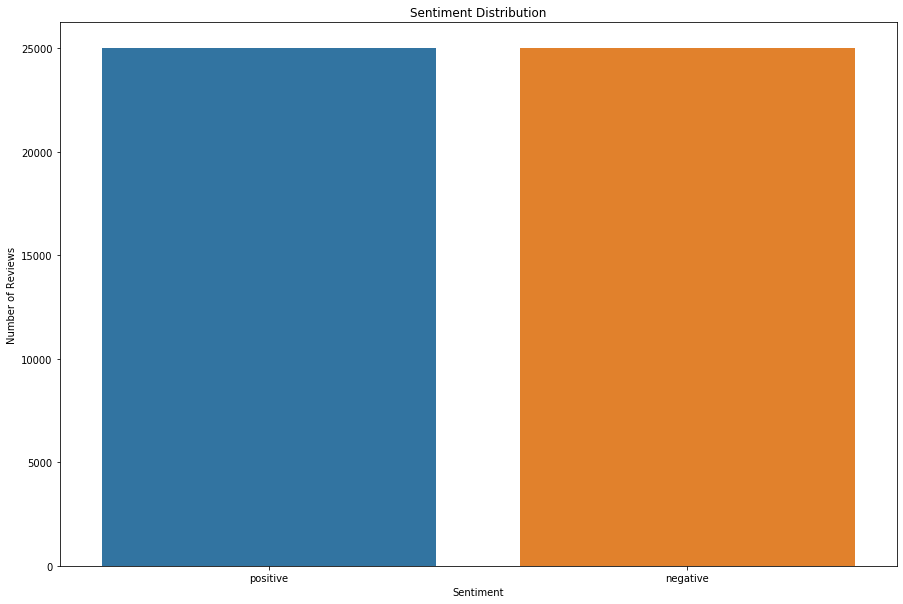

In [5]:
# Checking the data distribution

f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="sentiment", data=data)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment Distribution');

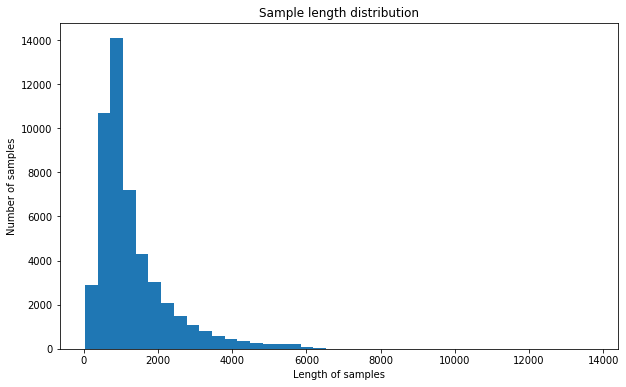

In [6]:
# Let's check the review length distribution in the data
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 40)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [0]:
# We need to remove stop words, the punctuation is also unnecessary

positive_reviews = data[data.sentiment=='positive']['review'].values
negative_reviews = data[data.sentiment=='negative']['review'].values

positive_reviews = [w for tweet in positive_reviews for w in word_tokenize(tweet)]
negative_reviews = [w for tweet in negative_reviews for w in  word_tokenize(tweet)]

punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['br', '\'s', 'n\'t', "\'\'", '``', '...']

terms_positive = [term.lower() for term in positive_reviews if term.lower() not in stop]
count_terms_positive = Counter(terms_positive)

terms_negative = [term.lower() for term in negative_reviews if term.lower() not in stop]
count_terms_negative = Counter(terms_negative)

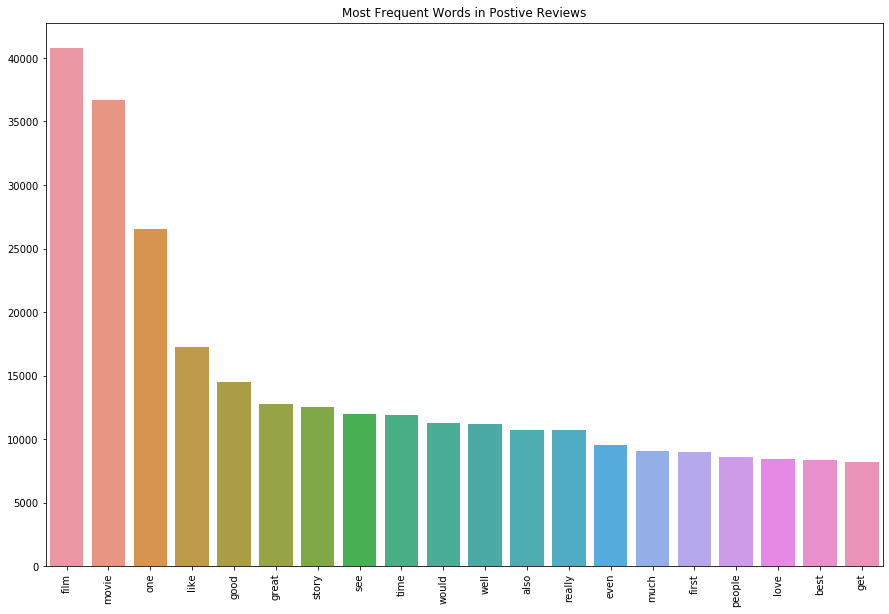

In [8]:
# Let's visualize the most frequent words in positive reviews

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(list(list(zip(*count_terms_positive.most_common()[0:20]))[0]), list(list(zip(*count_terms_positive.most_common()[0:20]))[1]))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.title("Most Frequent Words in Postive Reviews");


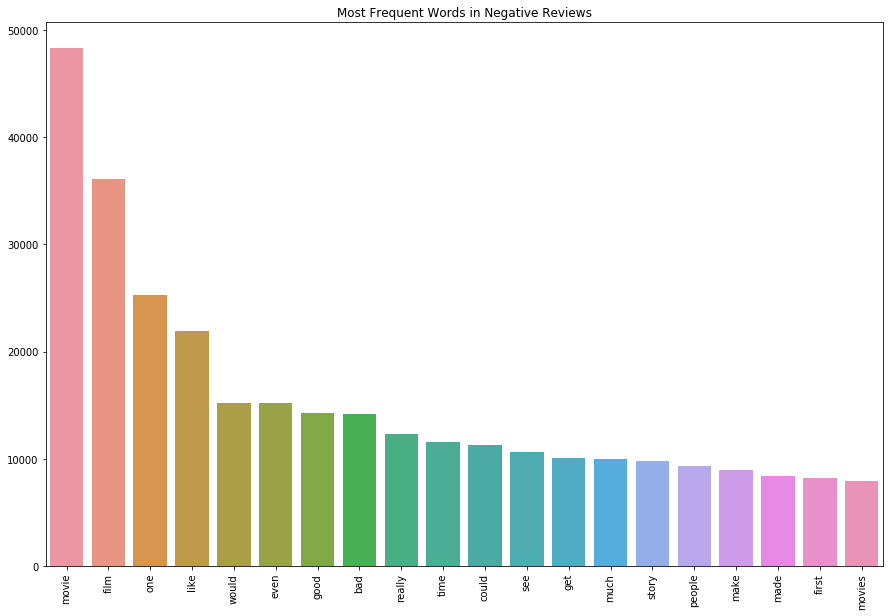

In [9]:
# Let's visualize the most frequent words in positive reviews

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(list(list(zip(*count_terms_negative.most_common()[0:20]))[0]), list(list(zip(*count_terms_negative.most_common()[0:20]))[1]))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.title("Most Frequent Words in Negative Reviews");